# Verifying with SkLearn,
this was NOT used in the remaining code

<class 'pandas.core.frame.DataFrame'>


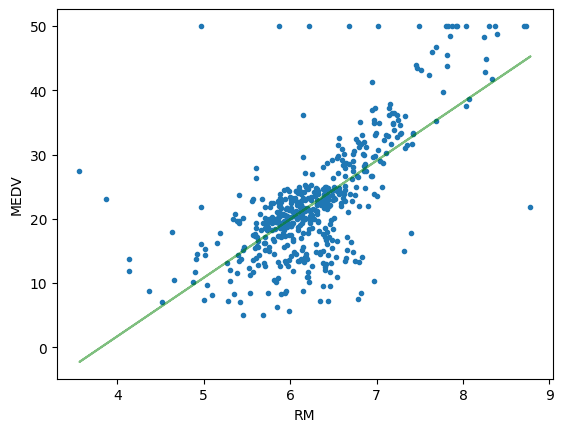

In [18]:
#Using SkLearn to double check for the correct implementation of linear regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Getting data
data = pd.read_csv('boston.csv')
# Getting rid of malformed data
data = data.replace('?', pd.NA)  # Convert all malformed data to NA
data = data.dropna()  # Remove all NA data

# Data definition
feature_column_name = 'RM'
target_column_name = 'MEDV'
x = data[[feature_column_name]]
y = data[target_column_name]

print(type(x))

# Estimation
model = LinearRegression()
fittedModel = model.fit(x, y)
yh = fittedModel.predict(x)

# Plot
plt.plot(x, y, '.')
plt.plot(x, yh, 'g-', alpha=.5)
plt.xlabel(feature_column_name)
plt.ylabel(target_column_name)
plt.show()

# IQR Outliers

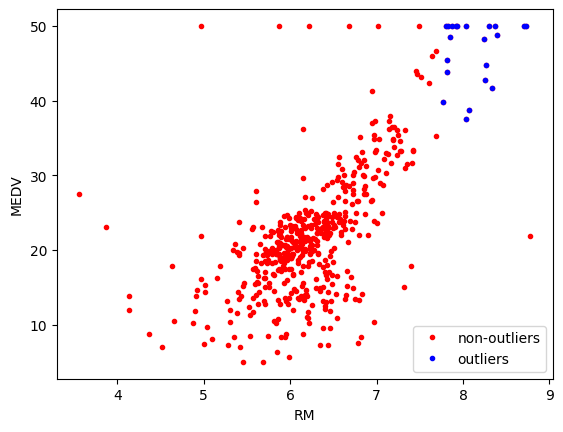

In [19]:
data = pd.concat([x, y], axis=1)

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for both x and y
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data < lower_bound) | (data > upper_bound)].dropna()

# Plot
plt.plot(x, y, '.', color="red", label="non-outliers")
plt.plot(outliers['RM'], outliers['MEDV'], '.', color="blue", label="outliers")
plt.legend()
plt.xlabel(feature_column_name)
plt.ylabel(target_column_name)
plt.show()

# Analytical Linear Regression

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression_Analytical:
    def __init__(self, include_bias = True):
        self.include_bias = include_bias
        self.coefficients = None

    def fit(self, x, y):
        num_samples = x.shape[0]
        if x.ndim == 1:
            x = x[:, None]

        if self.include_bias:
            x = np.column_stack([x, np.ones(num_samples)])

        self.coefficients = np.linalg.lstsq(x, y, rcond=None)[0]
        return self

    def predict(self, x):
        num_samples = x.shape[0]
        if self.include_bias:
            x = np.column_stack([x, np.ones(num_samples)])
        y_pred = x @ self.coefficients
        return y_pred

#getting data
data = pd.read_csv('boston.csv')
#getting rid of malformed datas
data = data.replace('?', pd.NA) #convert all malformed datas to NA
data = data.dropna() #remove all NA datas

#data definition
feature_column_name = 'RM'
target_column_name = 'MEDV'
x = data[feature_column_name]
y = data[target_column_name]

# Testing Analytical Linear Regression

# #Estimation
# model = LinearRegression_Analytical()
# fittedModel = model.fit(x,y)
# yh = fittedModel.predict(x)

# #Plot
# plt.plot(x, y, '.')
# plt.plot(x, yh, 'g-', alpha=.5)
# plt.xlabel(feature_column_name)
# plt.ylabel(target_column_name)
# plt.show()

# Mini-batch Stochastic Gradient Descent (Linear Regression)

In [21]:
class LinearRegression_Minibatch:
    def __init__(self, include_bias=True, learning_rate=0.01, batch_size=32, max_epochs=100, x_test=None, y_test=None):
        self.include_bias = include_bias
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.max_epochs = max_epochs
        self.coefficients = None
        self.mseConvergence = []
        self.iterations = []
        self.x_test = x_test
        self.y_test = y_test

    def fit(self, x, y):
        num_samples = x.shape[0]
        if x.ndim == 1:
            x = x[:, None]
        x = np.column_stack([x, np.ones(num_samples)])
        num_features = x.shape[1]

        self.coefficients = np.zeros(num_features)

        num_batches = num_samples // self.batch_size

        for epoch in range(self.max_epochs):
            for batch in range(num_batches):
                start = batch * self.batch_size
                end = (batch + 1) * self.batch_size
                x_batch = x[start:end]
                y_batch = y[start:end]

                predictions = x_batch @ self.coefficients
                errors = predictions - y_batch
                gradient = (x_batch.T @ errors) / self.batch_size

                self.coefficients -= self.learning_rate * gradient

            if (x_test is not None):
              y_test_pred = model.predict(x_test)
              mse_train = mean_square_error(y_test, y_test_pred)
              self.mseConvergence.append(mse_train)
              self.iterations.append(epoch)

        return self

    def predict(self, x):
        num_samples = x.shape[0]
        if self.include_bias:
            x = np.column_stack([x, np.ones(num_samples)])

        y_pred = x @ self.coefficients
        return y_pred

    def get_mseConvergence(self):
      return self.mseConvergence

    def get_iterations(self):
      return self.iterations


def train_test_split(x, y, test_size=0.2):
  num_samples = len(x)
  num_test = int(test_size * num_samples)
  indices = np.random.permutation(num_samples)
  test_indices = indices[:num_test]
  train_indices = indices[num_test:]
  x_train, y_train = x[train_indices], y[train_indices]
  x_test, y_test = x[test_indices], y[test_indices]

  return x_train, x_test, y_train, y_test

# #Testing Mini-batch stochastic gradient descent

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# model = LinearRegression_Minibatch(learning_rate=0.01, batch_size=32, max_epochs=100)
# model.fit(x_train, y_train)

# # Make predictions
# yh = model.predict(x_test)

# #Plots
# plt.scatter(x_train, y_train, c='red', label='training', marker='.')
# plt.scatter(x_test, y_test, c='blue', label='testing', marker='.')
# plt.plot(x_test, yh, 'g-', alpha=.5, label='prediction')
# plt.xlabel(feature_column_name)
# plt.ylabel(target_column_name)
# plt.legend()
# plt.show()

# Test/Train Split


<ipython-input-20-e1b31d0246ae>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, None]


Mean Squared Error (MSE) on Training Data: 37.68913819807657
Mean Squared Error (MSE) on Testing Data: 68.77547377591983
Root Mean Squared Error (MSE) on Training Data: 6.13914800262028
Root Mean Squared Error (MSE) on Testing Data: 8.293097960106333


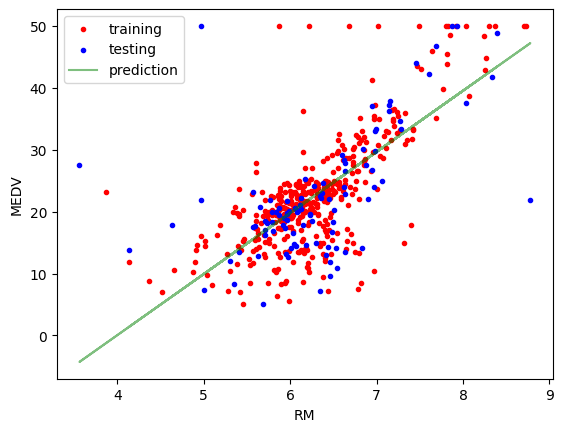

In [22]:
def mean_square_error(y_true, y_pred):
    squared_errors = [(true - pred) ** 2 for true, pred in zip(y_true, y_pred)]
    return sum(squared_errors) / len(y_true)

def mean_absolute_error(y_true, y_pred):
  absolute_errors = np.abs(y_true - y_pred)
  mae = np.mean(absolute_errors)
  return mae

def root_mean_squared_error(y_true, y_pred):
  mse = mean_square_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  return rmse

def r_squared(y_true, y_pred):
  mean_actual = np.mean(y_true)

  ssr = np.sum((y_true - y_pred) ** 2)
  sst = np.sum((y_true - mean_actual) ** 2)
  r_squared = 1 - (ssr / sst)

  return r_squared

def mean_absolute_percentage_error(y_true, y_pred):
  absolute_percentage_errors = np.abs((y_true - y_pred) / y_true)
  mape = np.mean(absolute_percentage_errors) * 100
  return mape

#Estimation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = LinearRegression_Analytical()
fittedModel = model.fit(x_train,y_train)
yh = fittedModel.predict(x_test)

#Prediction
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

mse_train = mean_square_error(y_train, y_train_pred)
mse_test = mean_square_error(y_test, y_test_pred)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print("Mean Squared Error (MSE) on Training Data:", mse_train)
print("Mean Squared Error (MSE) on Testing Data:", mse_test)

print("Root Mean Squared Error (MSE) on Training Data:", rmse_train)
print("Root Mean Squared Error (MSE) on Testing Data:", rmse_test)

#Plot
plt.scatter(x_train, y_train, c='red', label='training', marker='.')
plt.scatter(x_test, y_test, c='blue', label='testing', marker='.')
plt.plot(x_test, yh, 'g-', alpha=.5, label='prediction')
plt.xlabel(feature_column_name)
plt.ylabel(target_column_name)
plt.legend()
plt.show()

# 5-fold cross-validation technique

In [23]:
def kfold_cross_validation(x, y, model, k=5):
    n_samples = x.shape[0]
    fold_size = n_samples // k

    # Shuffle data
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    # Split data into k folds
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        folds.append((train_indices, test_indices))

    mae_list = []
    mse_list = []
    rmse_list = []
    rs_list = []
    mape_list = []

    for train_indices, test_indices in folds:
        x_train, y_train = x[train_indices], y[train_indices]
        x_test, y_test = x[test_indices], y[test_indices]

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # Performance metric
        mae_list.append(mean_absolute_error(y_test, y_pred))
        mse_list.append(mean_square_error(y_test, y_pred))
        rmse_list.append(root_mean_squared_error(y_test, y_pred))
        rs_list.append(r_squared(y_test, y_pred))
        mape_list.append(mean_absolute_percentage_error(y_test, y_pred))
    return mae_list, mse_list, rmse_list, rs_list, mape_list

#Estimation
model = LinearRegression_Analytical()

mae_list, mse_list, rmse_list, rs_list, mape_list = kfold_cross_validation(x, y, model, k=5)

print("Mean Absolute Error for each fold:", mae_list)
print("Mean Absolute Error across all folds:", np.mean(mae_list))
print()

print("Mean Squared Error for each fold:", mse_list)
print("Mean Squared Error across all folds:", np.mean(mse_list))
print()

print("Root Mean Squared Error for each fold:", rmse_list)
print("Root Mean Squared Error across all folds:", np.mean(rmse_list))
print()

print("R-squared for each fold:", rs_list)
print("R-squared across all folds:", np.mean(rs_list))
print()

print("Mean Absolute Percentage Error for each fold:", mape_list)
print("Mean Absolute Percentage Error across all folds:", np.mean(mape_list))

Mean Absolute Error for each fold: [4.122428802859325, 5.030416593733194, 5.270417485324409, 4.100861200222686, 3.862781837160818]
Mean Absolute Error across all folds: 4.477381183860086

Mean Squared Error for each fold: [34.66644669615731, 71.363171693235, 48.509269272661285, 35.7676690789292, 31.812880732448466]
Mean Squared Error across all folds: 44.42388749468625

Root Mean Squared Error for each fold: [5.88782189745557, 8.447672560725529, 6.964859601791072, 5.980607751636049, 5.640290837576416]
Root Mean Squared Error across all folds: 6.584250529836927

R-squared for each fold: [0.33324683667734445, 0.4162216107898148, 0.3999045608082352, 0.598581709169604, 0.5464084288374127]
R-squared across all folds: 0.45887262925648215

Mean Absolute Percentage Error for each fold: [27.65551536768458, 24.173864049898036, 35.25706651533926, 22.885745647371508, 19.659506041368196]
Mean Absolute Percentage Error across all folds: 25.926339524332313


<ipython-input-20-e1b31d0246ae>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, None]
<ipython-input-20-e1b31d0246ae>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, None]
<ipython-input-20-e1b31d0246ae>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, None]
<ipython-input-20-e1b31d0246ae>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, None]
<ipython-input-20-e1b31d0246ae>:13: FutureWarning: Support f

# Effects of Growing Subsets of Training Data

<ipython-input-20-e1b31d0246ae>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, None]


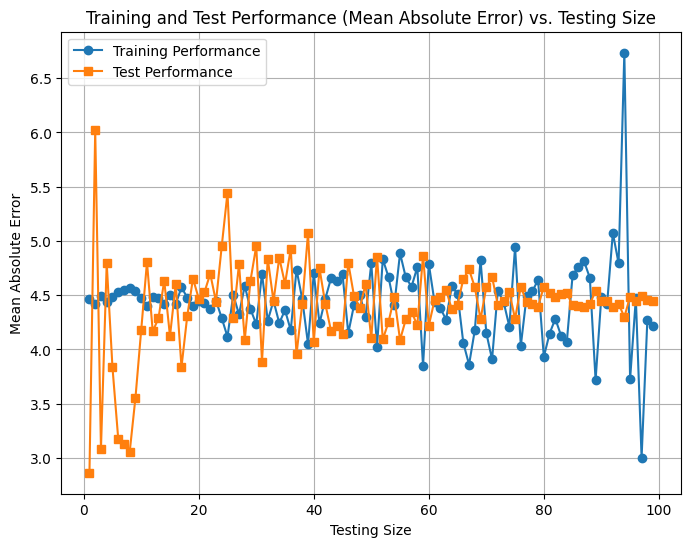

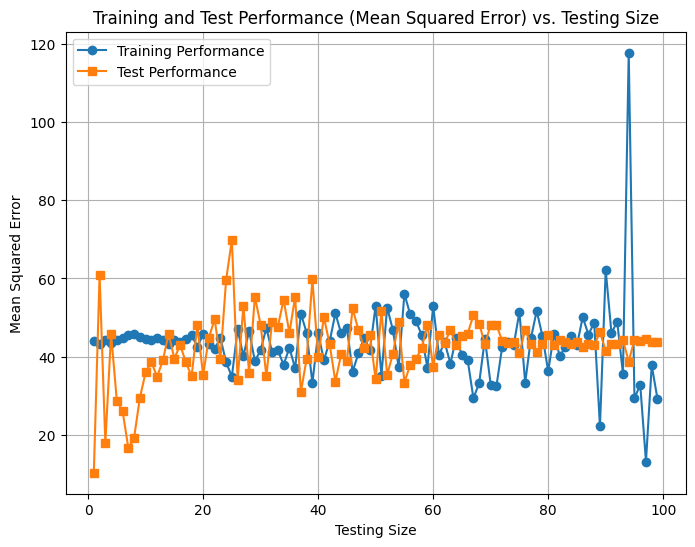

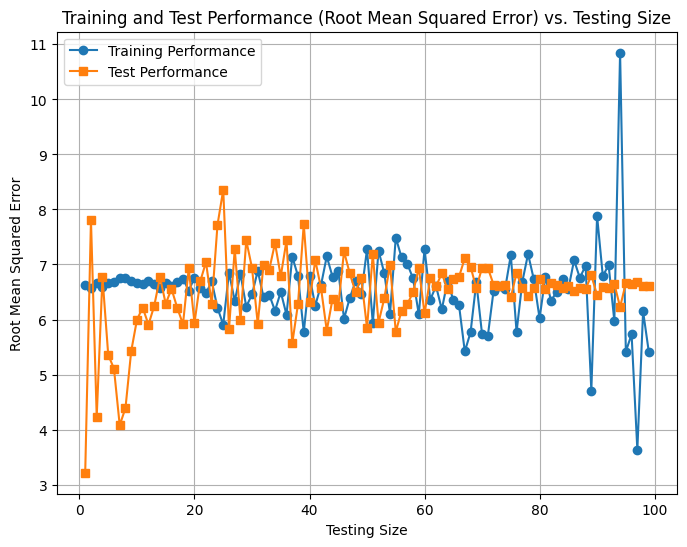

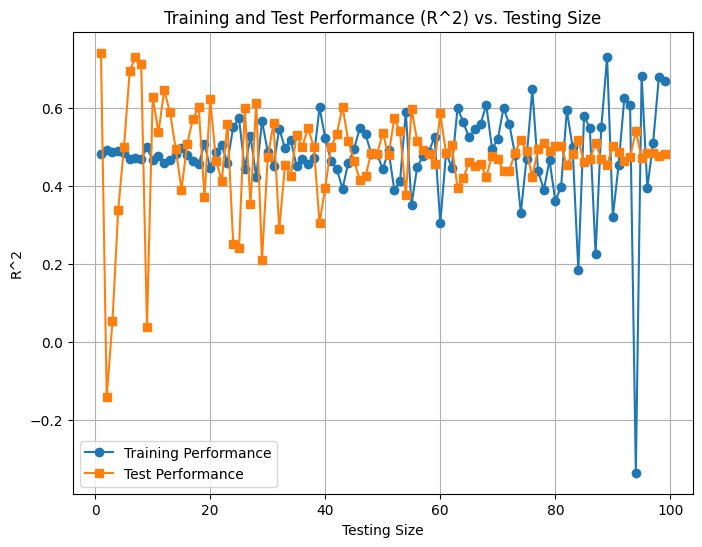

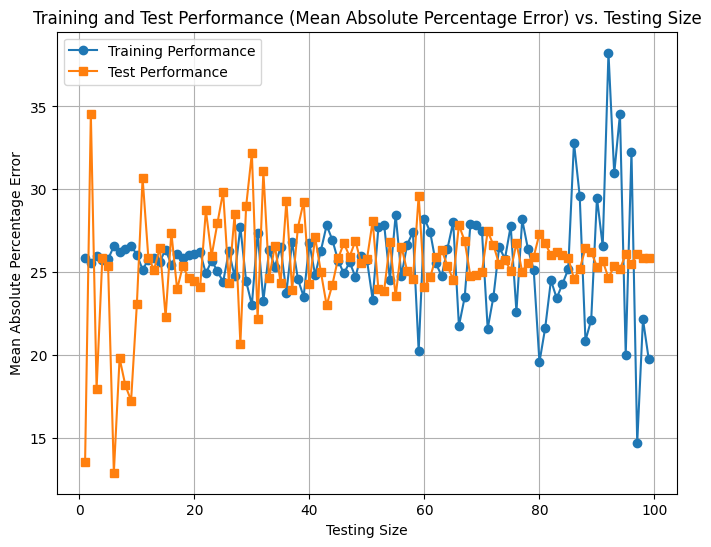

In [25]:
testing_size = []
mae_train_performance = []
mae_test_performance = []

mse_train_performance = []
mse_test_performance = []

rmse_train_performance = []
rmse_test_performance = []

rs_train_performance = []
rs_test_performance = []

mape_train_performance = []
mape_test_performance = []

model = LinearRegression_Analytical()
model.fit(x, y)

for i in range(1, 100):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=(0.01*i))

  # Estimation
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  testing_size.append(i)

  mae_train_performance.append(mean_absolute_error(y_train, y_train_pred))
  mae_test_performance.append(mean_absolute_error(y_test, y_test_pred))

  mse_train_performance.append(mean_square_error(y_train, y_train_pred))
  mse_test_performance.append(mean_square_error(y_test, y_test_pred))

  rmse_train_performance.append(root_mean_squared_error(y_train, y_train_pred))
  rmse_test_performance.append(root_mean_squared_error(y_test, y_test_pred))

  rs_train_performance.append(r_squared(y_train, y_train_pred))
  rs_test_performance.append(r_squared(y_test, y_test_pred))

  mape_train_performance.append(mean_absolute_percentage_error(y_train, y_train_pred))
  mape_test_performance.append(mean_absolute_percentage_error(y_test, y_test_pred))

#MAE plot
plt.figure(figsize=(8, 6))
plt.plot(testing_size, mae_train_performance, label='Training Performance', marker='o')
plt.plot(testing_size, mae_test_performance, label='Test Performance', marker='s')

plt.xlabel('Testing Size')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Performance (Mean Absolute Error) vs. Testing Size')
plt.legend()

plt.grid(True)
plt.show()


#MSE plot
plt.figure(figsize=(8, 6))
plt.plot(testing_size, mse_train_performance, label='Training Performance', marker='o')
plt.plot(testing_size, mse_test_performance, label='Test Performance', marker='s')

plt.xlabel('Testing Size')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Performance (Mean Squared Error) vs. Testing Size')
plt.legend()

plt.grid(True)
plt.show()


#RMSE plot
plt.figure(figsize=(8, 6))
plt.plot(testing_size, rmse_train_performance, label='Training Performance', marker='o')
plt.plot(testing_size, rmse_test_performance, label='Test Performance', marker='s')

plt.xlabel('Testing Size')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Test Performance (Root Mean Squared Error) vs. Testing Size')
plt.legend()

plt.grid(True)
plt.show()


#R^2 plot
plt.figure(figsize=(8, 6))
plt.plot(testing_size, rs_train_performance, label='Training Performance', marker='o')
plt.plot(testing_size, rs_test_performance, label='Test Performance', marker='s')

plt.xlabel('Testing Size')
plt.ylabel('R^2')
plt.title('Training and Test Performance (R^2) vs. Testing Size')
plt.legend()

plt.grid(True)
plt.show()

#MAPE plot
plt.figure(figsize=(8, 6))
plt.plot(testing_size, mape_train_performance, label='Training Performance', marker='o')
plt.plot(testing_size, mape_test_performance, label='Test Performance', marker='s')

plt.xlabel('Testing Size')
plt.ylabel('Mean Absolute Percentage Error')
plt.title('Training and Test Performance (Mean Absolute Percentage Error) vs. Testing Size')
plt.legend()

plt.grid(True)
plt.show()

# Effects of Growing Minibatch Sizes

<ipython-input-20-e1b31d0246ae>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, None]
<ipython-input-21-6ef19e69dd1f>:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, None]
<ipython-input-21-6ef19e69dd1f>:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, None]
<ipython-input-21-6ef19e69dd1f>:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, None]
<ipython-input-21-6ef19e69dd1f>:16: FutureWarning: Support f

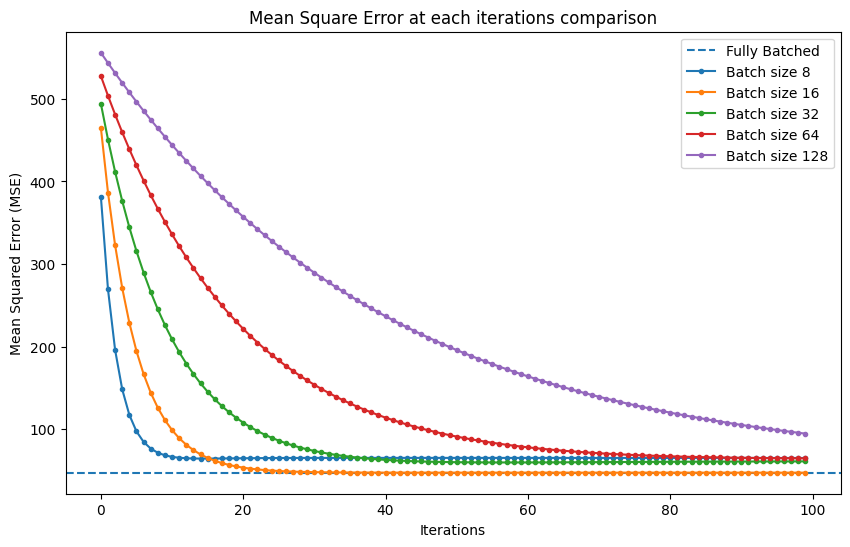

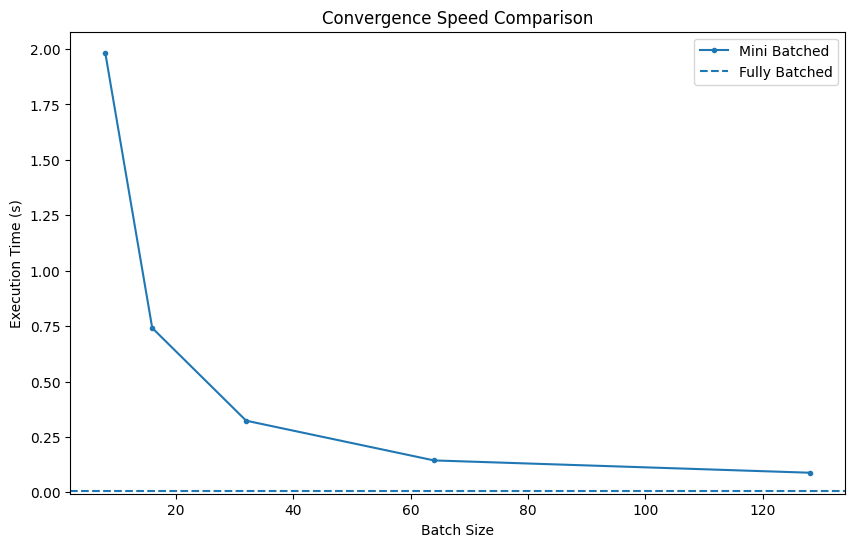

In [26]:
import time
minibatch_results = {}

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
minibatch_sizes = [8, 16, 32, 64, 128]

# Fully batched baseline
model_baseline = LinearRegression_Analytical()
start = time.time()
model_baseline.fit(x_train, y_train)
end = time.time()
full_batch_speed = end-start
y_test_pred_baseline = model_baseline.predict(x_test)
mse_baseline = mean_square_error(y_test, y_test_pred_baseline)

iterations_list = []
mseConvergence_list = []
speed_list = []

#diff minibatch
for minibatch_size in minibatch_sizes:
  model = LinearRegression_Minibatch(learning_rate=0.0001, batch_size=minibatch_size, max_epochs=100, x_test=x_test, y_test=y_test)

  start = time.time()
  model.fit(x_train, y_train)
  end = time.time()

  speed_list.append(end-start)
  iterations_list.append(model.get_iterations())
  mseConvergence_list.append(model.get_mseConvergence())

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  y_test_pred = model.predict(x_test)

  mse_test = mean_square_error(y_test, y_test_pred)
  minibatch_results[minibatch_size] = mse_test

#plot: MSE
plt.figure(figsize=(10, 6))
plt.axhline(y=mse_baseline, linestyle='--', label='Fully Batched')
for i in range(len(iterations_list)):
  plt.plot(iterations_list[i], mseConvergence_list[i], label='Batch size {}'.format(minibatch_sizes[i]), marker='.')

plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Square Error at each iterations comparison')
plt.legend()
plt.show()

#plot: speed
plt.figure(figsize=(10, 6))
plt.plot(minibatch_sizes, speed_list, marker='.', label='Mini Batched')
plt.axhline(y=full_batch_speed, linestyle='--', label='Fully Batched')
plt.xlabel('Batch Size')
plt.ylabel('Execution Time (s)')
plt.title('Convergence Speed Comparison')
plt.legend()
plt.show()

# Effects of Different Learning Rates

<ipython-input-5-8483e37534a2>:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, None]
<ipython-input-9-8c2516aa5046>:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_test, yh01, 'g-', alpha=.5, label='prediction for learning rate 0.01', color='green')
<ipython-input-9-8c2516aa5046>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_test, yh005, 'g-', alpha=.5, label='prediction for learning rate 0.005', color='blue')
<ipython-input-9-8c2516aa5046>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take pre

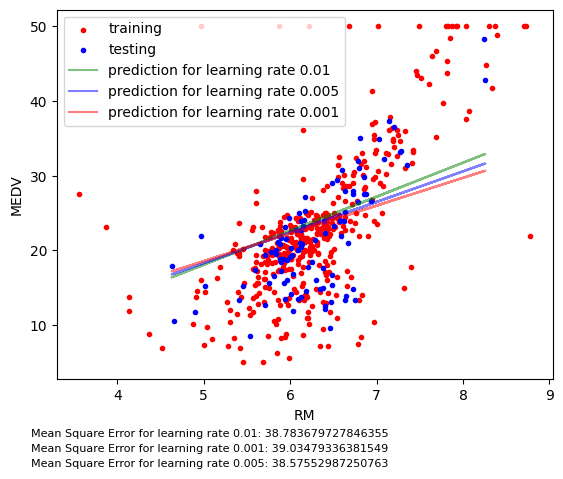

<ipython-input-9-8c2516aa5046>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_test, yh05, 'g-', alpha=.5, label='prediction for learning rate 0.05', color='purple')
<ipython-input-9-8c2516aa5046>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_test, yh01, 'g-', alpha=.5, label='prediction for learning rate 0.01', color='green')
<ipython-input-9-8c2516aa5046>:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_test, yh005, 'g-', alpha=.5, label='prediction for learning rate 0.005', color='blue')
<ipython-input-9-8c2516aa5046>:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt stri

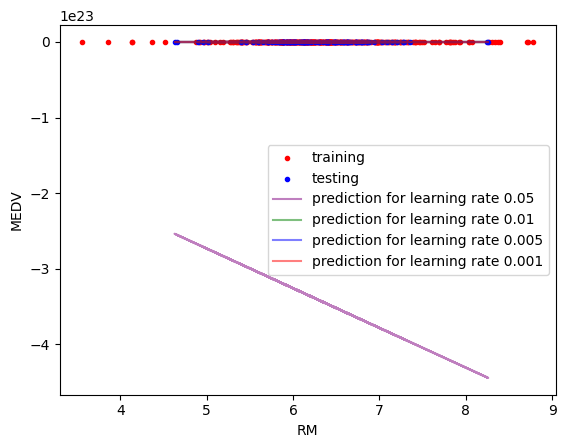

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model01 = LinearRegression_Minibatch(learning_rate=0.01, batch_size=32, max_epochs=100)
model01.fit(x_train, y_train)
yh01 = model01.predict(x_test)
mse01 = mean_square_error(y_test, yh01)

model001 = LinearRegression_Minibatch(learning_rate=0.001, batch_size=32, max_epochs=100)
model001.fit(x_train, y_train)
yh001 = model001.predict(x_test)
mse001 = mean_square_error(y_test, yh001)

model005 = LinearRegression_Minibatch(learning_rate=0.005, batch_size=32, max_epochs=100)
model005.fit(x_train, y_train)
yh005 = model005.predict(x_test)
mse005 = mean_square_error(y_test, yh005)

model05 = LinearRegression_Minibatch(learning_rate=0.05, batch_size=32, max_epochs=100)
model05.fit(x_train, y_train)
yh05 = model05.predict(x_test)
mse05 = mean_square_error(y_test, yh05)

#plot: all convergent
plt.scatter(x_train, y_train, c='red', label='training', marker='.')
plt.scatter(x_test, y_test, c='blue', label='testing', marker='.')
plt.plot(x_test, yh01, 'g-', alpha=.5, label='prediction for learning rate 0.01', color='green')
plt.plot(x_test, yh005, 'g-', alpha=.5, label='prediction for learning rate 0.005', color='blue')
plt.plot(x_test, yh001, 'g-', alpha=.5, label='prediction for learning rate 0.001', color='red')
plt.text(3, -5, "Mean Square Error for learning rate 0.01: {}".format(mse01), fontsize=8)
plt.text(3, -7, "Mean Square Error for learning rate 0.001: {}".format(mse001), fontsize=8)
plt.text(3, -9, "Mean Square Error for learning rate 0.005: {}".format(mse005), fontsize=8)
plt.xlabel(feature_column_name)
plt.ylabel(target_column_name)
plt.legend()
plt.show()

#plot: one divergent
plt.scatter(x_train, y_train, c='red', label='training', marker='.')
plt.scatter(x_test, y_test, c='blue', label='testing', marker='.')
plt.plot(x_test, yh05, 'g-', alpha=.5, label='prediction for learning rate 0.05', color='purple')
plt.plot(x_test, yh01, 'g-', alpha=.5, label='prediction for learning rate 0.01', color='green')
plt.plot(x_test, yh005, 'g-', alpha=.5, label='prediction for learning rate 0.005', color='blue')
plt.plot(x_test, yh001, 'g-', alpha=.5, label='prediction for learning rate 0.001', color='red')
plt.xlabel(feature_column_name)
plt.ylabel(target_column_name)
plt.legend()
plt.show()

# Parameter Configuration choices

<ipython-input-5-8483e37534a2>:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, None]


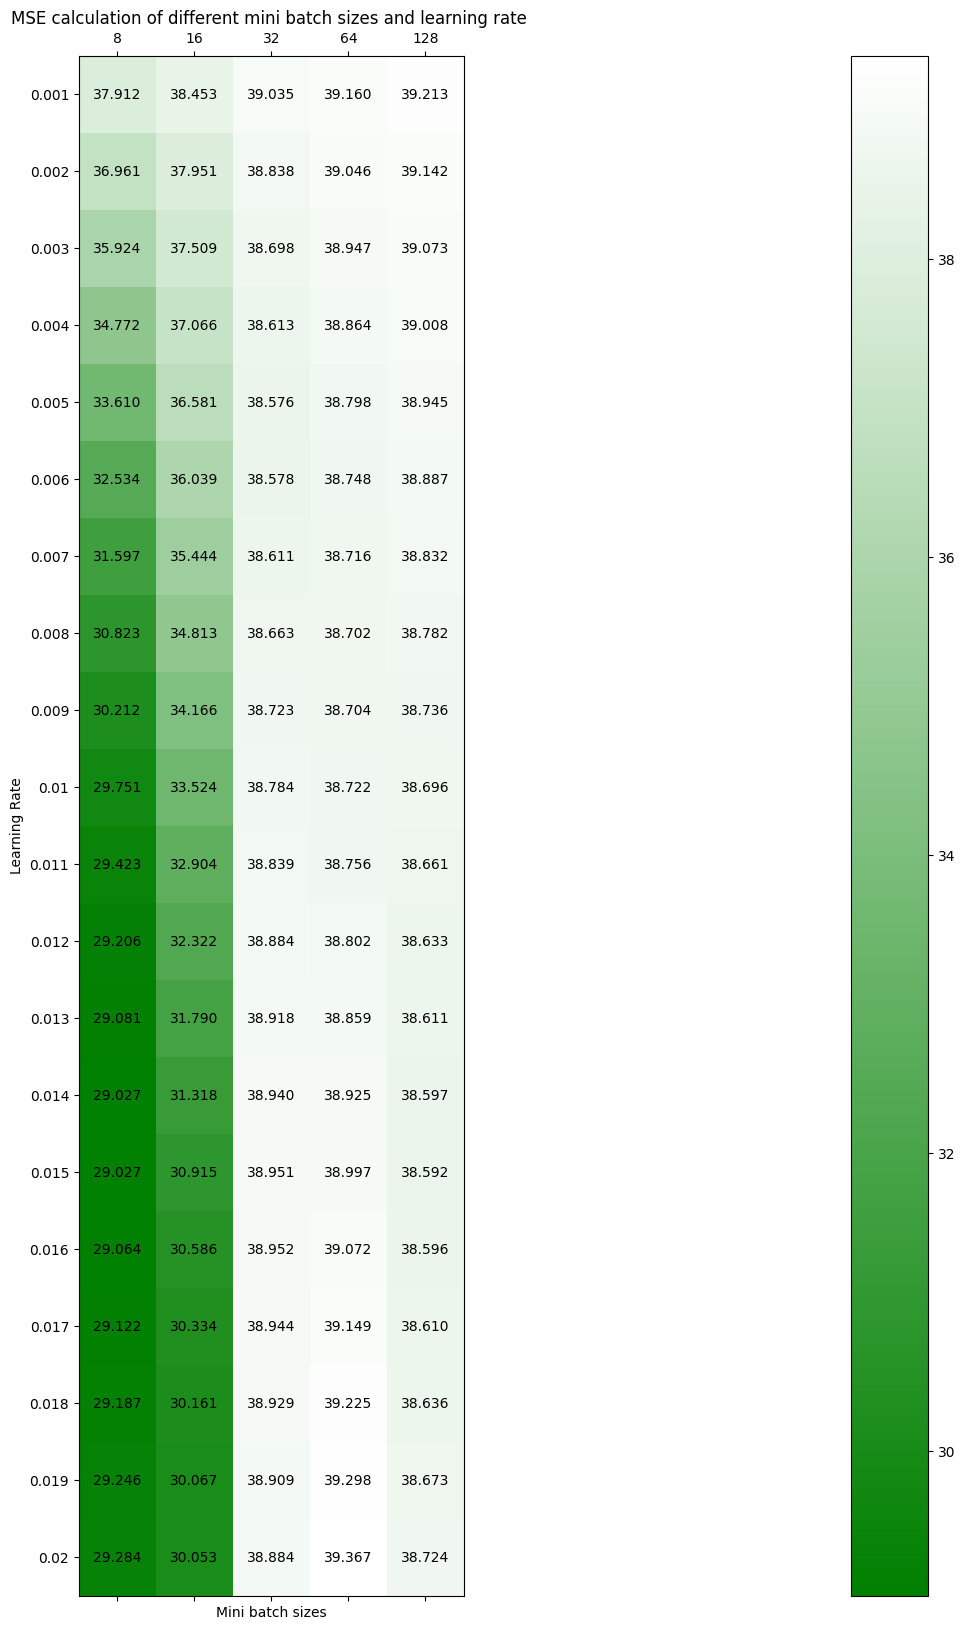

In [ ]:
import matplotlib.colors as mcolors

minibatch_sizes = [8, 16, 32, 64, 128]

width = len(minibatch_sizes)
height = 20

mse_table = np.zeros((height, width), dtype=float)
ls_list = []

#calculating mse for different parameter
for lr in range(0, height):
    for bs in range(len(minibatch_sizes)):
        model = LinearRegression_Minibatch(learning_rate=0.001*(lr+1), batch_size=minibatch_sizes[bs], max_epochs=100)
        model.fit(x_train, y_train)
        yh = model.predict(x_test)
        mse = mean_square_error(y_test, yh)

        mse = min(mse, 50)
        mse_table[lr, bs] = round(mse, 3)
    ls_list.append(round((0.001*lr) + 0.001, 3))

#color coding
cmap = mcolors.LinearSegmentedColormap.from_list('green_to_white', [(0, 'green'), (1, 'white')])

fig, ax = plt.subplots(figsize=(100, 20))
cax = ax.matshow(mse_table, cmap=cmap)
plt.colorbar(cax)

ax.set_xticks(np.arange(width))
ax.set_yticks(np.arange(height))
ax.set_xticklabels(minibatch_sizes)
ax.set_yticklabels(ls_list)

# Display valye in each cell
for i in range(height):
    for j in range(width):
        if mse_table[i, j] == 50:
          mse_label = f'{mse_table[i, j]}'
        else:
          mse_label = f'{mse_table[i, j]:.3f}'
        text = ax.text(j, i, mse_label, ha='center', va='center', color='black', fontsize=10)

plt.xlabel('Mini batch sizes')
plt.ylabel('Learning Rate')
plt.title('MSE calculation of different mini batch sizes and learning rate')
plt.show()

# Gaussian Basis Functions

<ipython-input-1-8b996eff1cd5>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, None]


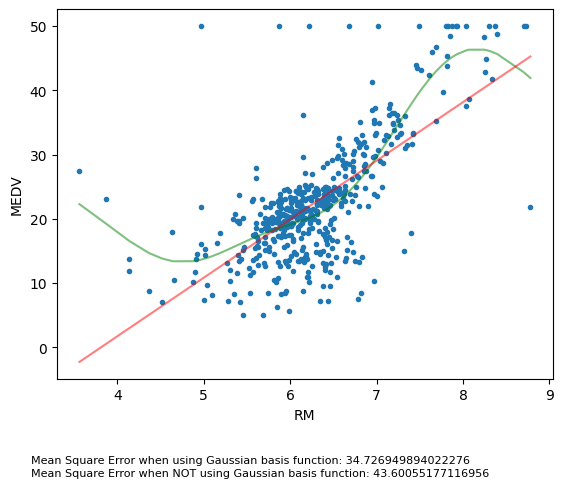

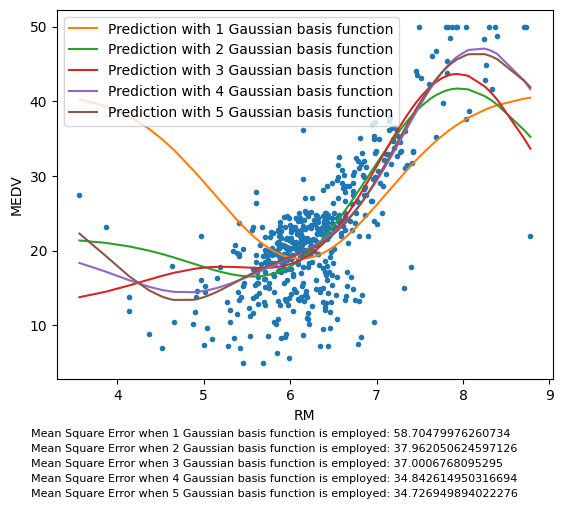

In [ ]:
#getting data
data = pd.read_csv('boston.csv')
#getting rid of malformed datas
data = data.replace('?', pd.NA) #convert all malformed datas to NA
data = data.dropna() #remove all NA datas

#data definition
feature_column_name = 'RM'
target_column_name = 'MEDV'
x = data[feature_column_name]
y = data[target_column_name]

sorted_indices = np.argsort(x)
x = x[sorted_indices]
y = y[sorted_indices]

num_gaussian_basis_functions = 5
u_values = np.random.choice(x, num_gaussian_basis_functions)

def gaussian_basis_function(x, u, s=1):
    return np.exp(-((x - u) ** 2) / (2 * (s ** 2)))

enriched_features = np.zeros((len(x), num_gaussian_basis_functions))
tempFitted_yh_list = []
tempFitted_mse_list = []

for i in range(num_gaussian_basis_functions):
    enriched_features[:, i] = gaussian_basis_function(x, u_values[i], 1)
    tempModel = LinearRegression_Analytical()
    tempModel.fit(enriched_features,y)
    tempFitted_yh = tempModel.predict(enriched_features)
    tempFitted_mse = mean_square_error(y, tempFitted_yh)

    tempFitted_yh_list.append(tempFitted_yh)
    tempFitted_mse_list.append(tempFitted_mse)

#Estimation with Gaussian
fittedModel = LinearRegression_Analytical()
fittedModel.fit(enriched_features,y)
fitted_yh = fittedModel.predict(enriched_features)
fitted_mse = mean_square_error(y, fitted_yh)

#Regular Estimation
model = LinearRegression_Analytical()
model.fit(x,y)
yh = model.predict(x)
mse = mean_square_error(y, yh)

#Plot
plt.plot(x, y, '.')
plt.plot(x, fitted_yh, 'g-', alpha=.5)
plt.plot(x, yh, 'r-', alpha=.5)
plt.xlabel(feature_column_name)
plt.ylabel(target_column_name)
plt.text(3, -18, "Mean Square Error when using Gaussian basis function: {}".format(fitted_mse), fontsize=8)
plt.text(3, -20, "Mean Square Error when NOT using Gaussian basis function: {}".format(mse), fontsize=8)
plt.show()

#Plot
plt.plot(x, y, '.')
for i in range(len(tempFitted_yh_list)):
  plt.plot(x, tempFitted_yh_list[i], label='Prediction with {} Gaussian basis function'.format(i+1))
for i in range(len(tempFitted_mse_list)):
  plt.text(3, -5-(2*i), "Mean Square Error when {} Gaussian basis function is employed: {}".format(i+1, tempFitted_mse_list[i]), fontsize=8)
plt.xlabel(feature_column_name)
plt.ylabel(target_column_name)
plt.legend()
plt.show()

# Gradient Descent vs Analytical Linear Regression


<ipython-input-5-8483e37534a2>:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, None]
<ipython-input-2-8b996eff1cd5>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, None]


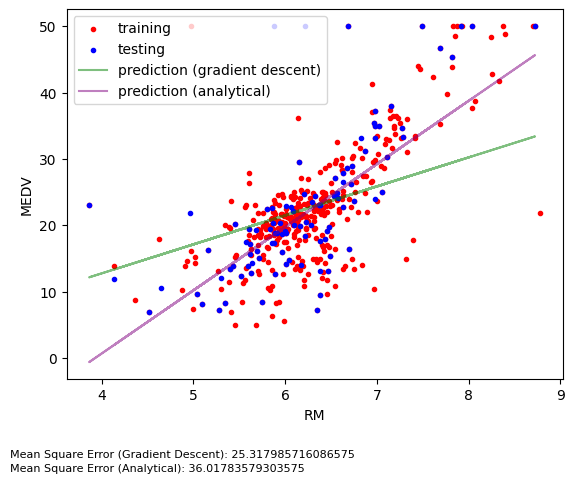

In [ ]:
model_gradient = LinearRegression_Minibatch(learning_rate=0.01, batch_size=32, max_epochs=100)
model_gradient.fit(x_train, y_train)
yh_gradient = model_gradient.predict(x_test)
mse_gradient = mean_square_error(y_train, yh_gradient)

model = LinearRegression_Analytical()
model.fit(x_train,y_train)
yh = model.predict(x_test)
mse = mean_square_error(y_train, yh)

#Plot
plt.scatter(x_train, y_train, c='red', label='training', marker='.')
plt.scatter(x_test, y_test, c='blue', label='testing', marker='.')
plt.plot(x_test, yh_gradient, 'g-', alpha=.5, label='prediction (gradient descent)')
plt.plot(x_test, yh, color='purple', alpha=.5, label='prediction (analytical)')
plt.xlabel(feature_column_name)
plt.ylabel(target_column_name)
plt.text(3, -15, "Mean Square Error (Gradient Descent): {}".format(mse_gradient), fontsize=8)
plt.text(3, -17, "Mean Square Error (Analytical): {}".format(mse), fontsize=8)
plt.legend()
plt.show()